<a href="https://colab.research.google.com/github/sharaddobariya05/HSI-classification-/blob/master/Botswana_HSI_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import plotly.express as px
import seaborn as sns
sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
import hvplot
import hvplot.pandas
#!pip install hvplot
pd.options.plotting.backend = 'hvplot'

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
cd '/content/gdrive/My Drive/hsi/data'

/content/gdrive/My Drive/hsi/data


In [13]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('Botswana.mat')['Botswana']
  y = loadmat('Botswana_gt.mat')['Botswana_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (1476, 256, 145)
y shape: (1476, 256)


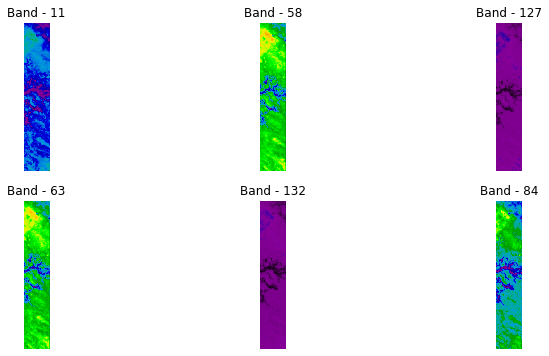

In [14]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')
#plt.savefig('IP_Bands.png')

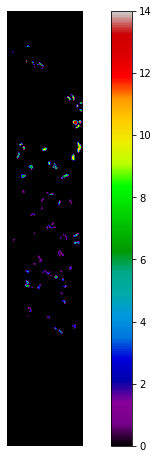

In [15]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_GT.png')
plt.show()

In [16]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)

In [17]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band107,band108,band109,band110,band111,band112,band113,band114,band115,band116,band117,band118,band119,band120,band121,band122,band123,band124,band125,band126,band127,band128,band129,band130,band131,band132,band133,band134,band135,band136,band137,band138,band139,band140,band141,band142,band143,band144,band145,class
0,3996,3952,3698,3457,3063,2914,2796,2538,2629,2613,2533,2517,2306,2149,2065,1994,1943,1840,1779,1726,1654,1519,1542,1478,1404,1600,2755,2806,3459,4137,4008,2741,4144,4268,4069,4020,3537,3335,3582,3868,...,450,385,316,240,157,98,149,142,106,91,107,158,164,163,166,184,196,181,169,156,159,134,135,144,159,142,138,145,138,110,104,114,89,89,77,73,60,53,54,0
1,3996,3952,3698,3457,3063,2914,2796,2538,2629,2613,2533,2517,2306,2149,2065,1994,1943,1840,1779,1726,1654,1519,1542,1478,1404,1600,2029,2172,2672,3195,3184,2182,3316,3402,3199,3147,2763,2517,2841,3098,...,427,371,301,226,145,92,128,134,92,85,114,140,149,158,159,166,175,160,151,137,141,133,135,132,143,134,123,133,122,117,109,103,83,93,80,69,59,54,57,0
2,4100,3923,3615,3451,2941,2886,2850,2581,2628,2616,2607,2479,2359,2118,2099,1946,1971,1885,1743,1774,1680,1566,1534,1494,1375,1603,2152,2277,2870,3474,3502,2441,3612,3677,3489,3410,2991,2866,3101,3280,...,365,324,270,199,131,70,95,101,76,75,98,105,124,134,138,135,140,123,118,111,112,123,119,110,114,103,95,107,98,113,102,85,67,89,79,55,52,51,56,0
3,3908,3889,3594,3343,2975,2813,2665,2445,2532,2489,2423,2328,2209,2039,1944,1871,1850,1700,1616,1564,1493,1398,1356,1345,1271,1463,2046,2243,2939,3522,3582,2506,3674,3793,3590,3536,3125,2942,3194,3397,...,370,324,263,200,143,68,100,103,85,74,86,111,126,139,147,125,121,125,120,106,116,117,106,110,118,109,107,106,108,103,94,75,61,73,64,50,57,48,45,0
4,4007,3926,3767,3445,3038,2945,2914,2588,2616,2624,2608,2509,2347,2176,2099,2002,1982,1889,1775,1687,1705,1531,1530,1454,1450,1631,2222,2426,3174,3859,3855,2711,4073,4139,3992,3948,3447,3264,3517,3747,...,380,327,259,198,142,67,102,116,94,68,82,116,127,147,154,118,106,122,120,106,119,106,97,112,119,122,119,113,111,94,88,63,57,62,51,49,56,42,41,0


In [18]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,band11,band12,band13,band14,band15,band16,band17,band18,band19,band20,band21,band22,band23,band24,band25,band26,band27,band28,band29,band30,band31,band32,band33,band34,band35,band36,band37,band38,band39,band40,...,band106,band107,band108,band109,band110,band111,band112,band113,band114,band115,band116,band117,band118,band119,band120,band121,band122,band123,band124,band125,band126,band127,band128,band129,band130,band131,band132,band133,band134,band135,band136,band137,band138,band139,band140,band141,band142,band143,band144,band145
count,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,...,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000,377856.000000
mean,4626.981025,4558.423339,4312.870522,4131.780639,3722.890919,3632.843192,3571.103071,3349.515736,3447.072885,3413.784397,3402.295478,3362.532052,3207.175599,3088.414015,3063.382995,3008.060677,3042.127742,2911.490915,2816.219779,2810.493344,2789.943074,2630.331256,2694.392083,2645.822078,2495.900748,2720.606329,3154.382685,3018.035019,3563.496972,4082.759003,3995.559028,2778.945667,4082.427030,4207.940554,4034.748084,3952.802671,3475.551543,3265.052348,3543.345211,3809.707119,...,573.814527,555.983615,501.470304,409.190710,297.706409,196.905205,137.751755,222.827643,212.220100,147.434618,146.395637,177.028551,215.916227,228.626456,234.302062,232.386134,235.075322,243.669258,237.454768,224.574597,214.654511,217.125090,207.025285,202.945633,197.123150,210.095277,204.817716,193.531512,177.040894,163.751654,150.045017,145.363212,142.948099,128.937116,132.520182,119.707677,116.409399,108.351658,92.398485,94.498529
std,476.366499,483.067169,510.882018,536.062594,519.783919,546.187452,569.387901,560.993571,598.293570,610.126224,632.967581,655.546505,655.598320,664.027316,690.258993,698.903859,735.381022,725.914564,719.729457,736.085704,754.822758,733.251733,782.040956,787.500879,729.508720,745.189045,752.330050,680.075047,806.918522,920.877251,895.771657,617.031248,939.403406,952.144174,911.736317,893.285720,781.504433,742.855002,820.144723,889.880570,...,185.620335,181.052300,164.392676,134.546889,96.886521,63.425158,52.577892,87.995203,83.085444,56.267996,57.357482,70.012719,85.950349,91.101791,92.689518,92.012145,91.415009,94.163247,91.261958,84.471808,79.575326,79.996643,74.294374,73.357356,72.134448,78.077698,78.044170,75.054737,68.350120,64.271103,59.931175,58.743419,56.859693,51.163953,53.273087,48.576580,48.283025,45.358832,38.049712,39.202092
min,3308.000000,3212.000000,2571.000000,2639.000000,2303.000000,2173.000000,2096.000000,1902.000000,1811.000000,1747.000000,1638.000000,1545.000000,1402.000000,1306.000000,1245.000000,1160.000000,1093.000000,1012.000000,758.000000,911.000000,863.000000,792.000000,759.000000,738.000000,679.000000,654.000000,619.000000,546.000000,539.000000,546.000000,490.000000,359.000000,458.000000,458.000000,414.000000,434.000000,358.000000,355.000000,332.000000,324.000000,...,0.000000,0.000000,0.000000,0.

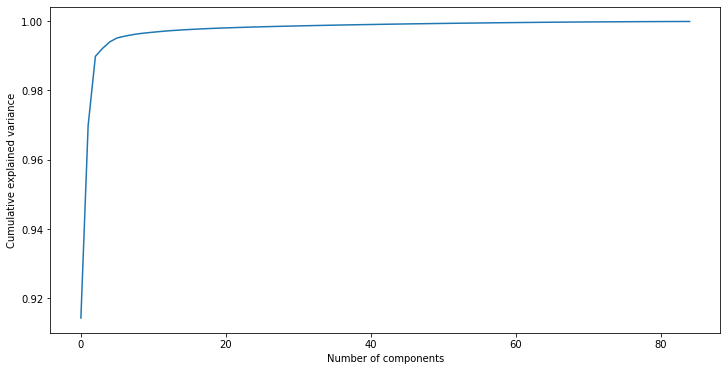

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 85)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()


In [21]:
pca = PCA(n_components = 71)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,72)]+['class']

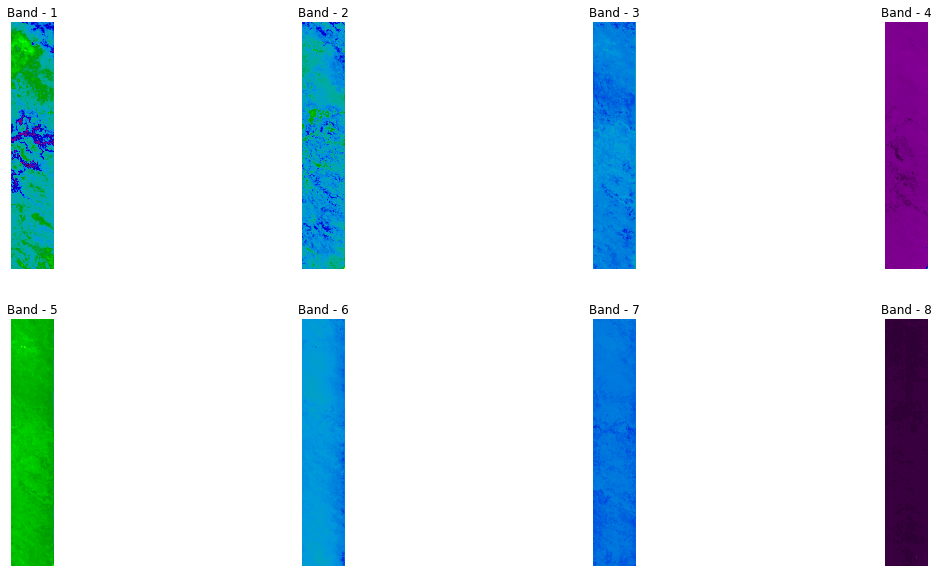

In [23]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(1476, 256), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

#plt.savefig('IP_PCA_Bands.png')

In [25]:

x = q[q['class'] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, 'class'].values 

names = ['1',	'2', '3','4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm =  SVC(C = 105, kernel = 'rbf', cache_size = 10*1024)

svm.fit(X_train, y_train)

ypred = svm.predict(X_test)

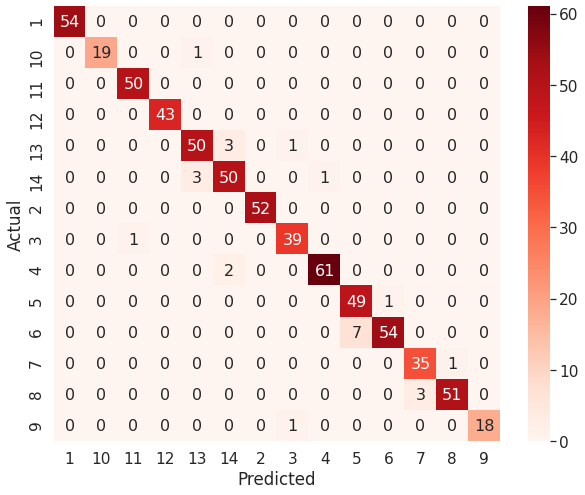

In [28]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

In [29]:
print(classification_report(y_test, ypred, target_names = names))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        54
           2       1.00      0.95      0.97        20
           3       0.98      1.00      0.99        50
           4       1.00      1.00      1.00        43
           5       0.93      0.93      0.93        54
           6       0.91      0.93      0.92        54
           7       1.00      1.00      1.00        52
           8       0.95      0.97      0.96        40
           9       0.98      0.97      0.98        63
          10       0.88      0.98      0.92        50
          11       0.98      0.89      0.93        61
          12       0.92      0.97      0.95        36
          13       0.98      0.94      0.96        54
          14       1.00      0.95      0.97        19

    accuracy                           0.96       650
   macro avg       0.96      0.96      0.96       650
weighted avg       0.96      0.96      0.96       650



In [30]:
l=[]
for i in range(q.shape[0]):
  if q.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

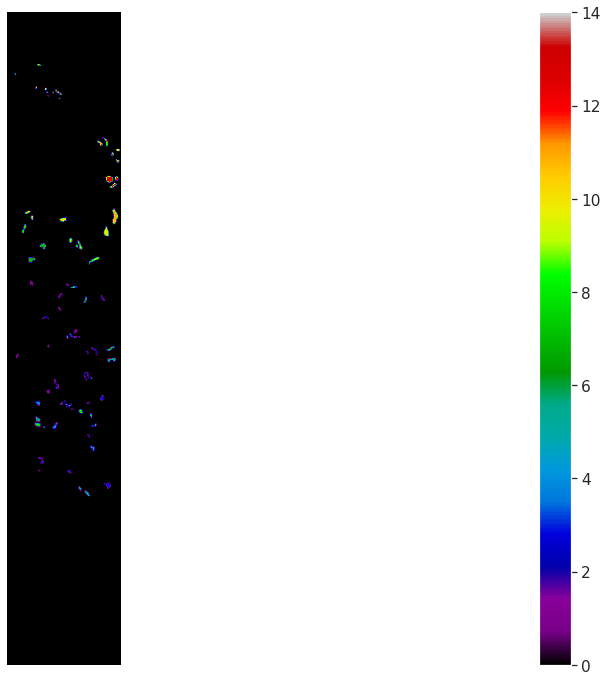

In [41]:
clmap = np.array(l).reshape(1476, 256).astype('float')
plt.figure(figsize=(150, 12))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
#plt.savefig('IP_cmap.png')
plt.show()